In [0]:
from keras.datasets import cifar10

In [0]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt
#from keras.layers import  Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation

In [0]:
# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMAGE_SIZE = 32

In [0]:
#constant
BATCH_SIZE = 128
NB_EPOCH = 20
NB_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [75]:
#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

In [0]:
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
def pure_cnn_model():
    
    model = Sequential()
    
    model.add(Conv2D(96, (3, 3), activation='relu', padding = 'same', input_shape=(IMAGE_SIZE,IMAGE_SIZE,IMG_CHANNELS)))    
    model.add(Dropout(0.2))
    
    model.add(Conv2D(96, (3, 3), activation='relu', padding = 'same'))  
    model.add(Conv2D(96, (3, 3), activation='relu', padding = 'same', strides = 2))    
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192, (3, 3), activation='relu', padding = 'same'))    
    model.add(Conv2D(192, (3, 3), activation='relu', padding = 'same'))
    model.add(Conv2D(192, (3, 3), activation='relu', padding = 'same', strides = 2))    
    model.add(Dropout(0.5))    
    
    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (1, 1),padding='valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10, (1, 1), padding='valid'))

    model.add(GlobalAveragePooling2D())
    
    model.add(Activation('softmax'))

    model.summary()
    
    return model

In [79]:
model = pure_cnn_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
dropout_16 (Dropout)         (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_17 (Dropout)         (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 16, 16, 192)       166080    
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 16, 16, 192)       331968    
__________

In [46]:
# train
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,
metrics=['accuracy'])
history=model.fit(X_train, Y_train, batch_size=BATCH_SIZE,
epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT,
verbose=VERBOSE)
score = model.evaluate(X_test, Y_test,
batch_size=BATCH_SIZE, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 46s 1ms/step - loss: 2.2032 - acc: 0.1759 - val_loss: 2.0527 - val_acc: 0.2547
Epoch 2/20
40000/40000 [==============================] - 45s 1ms/step - loss: 1.8431 - acc: 0.3186 - val_loss: 1.6107 - val_acc: 0.3957
Epoch 3/20
40000/40000 [==============================] - 45s 1ms/step - loss: 1.6190 - acc: 0.4058 - val_loss: 1.6082 - val_acc: 0.4124
Epoch 4/20
40000/40000 [==============================] - 45s 1ms/step - loss: 1.4602 - acc: 0.4670 - val_loss: 1.3824 - val_acc: 0.4795
Epoch 5/20
40000/40000 [==============================] - 45s 1ms/step - loss: 1.3244 - acc: 0.5191 - val_loss: 1.5686 - val_acc: 0.4484
Epoch 6/20
40000/40000 [==============================] - 45s 1ms/step - loss: 1.2227 - acc: 0.5614 - val_loss: 1.1726 - val_acc: 0.5718
Epoch 7/20
40000/40000 [==============================] - 45s 1ms/step - loss: 1.1208 - acc: 0.6016 - val_loss: 1.0511 - val_acc

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


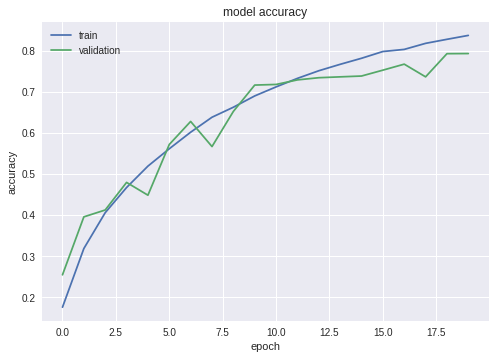

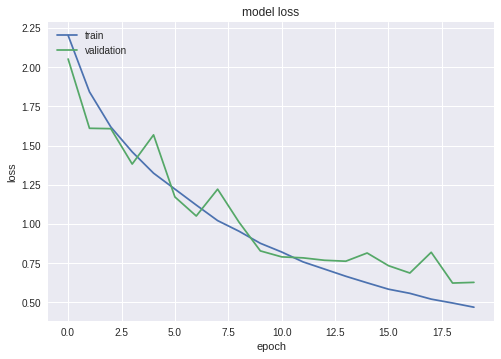

In [47]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [49]:
from google.colab import files
!rm -r *
!mkdir data
!ls

data


In [51]:
files.upload()
!ls

Saving arplane.jpg to arplane (1).jpg
Saving atmb.jpg to atmb (1).jpg
Saving bird.jpg to bird (1).jpg
Saving cat.jpg to cat (1).jpg
Saving deer.jpg to deer (1).jpg
Saving dog.jpg to dog (1).jpg
Saving dog2.jpg to dog2 (1).jpg
Saving frog.jpg to frog (1).jpg
Saving horse.jpg to horse (1).jpg
Saving ship.jpg to ship.jpg
Saving truck.jpg to truck.jpg
'arplane (1).jpg'   bird.jpg	    deer.jpg	   'frog (1).jpg'    truck.jpg
 arplane.jpg	   'cat (1).jpg'   'dog (1).jpg'    frog.jpg
'atmb (1).jpg'	    cat.jpg	   'dog2 (1).jpg'  'horse (1).jpg'
 atmb.jpg	    data	    dog2.jpg	    horse.jpg
'bird (1).jpg'	   'deer (1).jpg'   dog.jpg	    ship.jpg


In [0]:
import scipy.misc

In [0]:
import numpy as np

In [54]:
imgs = scipy.misc.imread('dog.jpg')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


In [55]:
imgs = scipy.misc.imresize(imgs, (32,32))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


In [56]:
model.predict_classes(imgs.reshape(1,32,32,3))

array([7])

In [57]:
files.upload()

{}

In [58]:
imgs = scipy.misc.imread('dog.jpg')
imgs = scipy.misc.imresize(imgs, (32,32))
model.predict_classes(imgs.reshape(1,32,32,3))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


array([7])

In [59]:
files.upload()
!ls

'arplane (1).jpg'   bird.jpg	    deer.jpg	   'frog (1).jpg'    truck.jpg
 arplane.jpg	   'cat (1).jpg'   'dog (1).jpg'    frog.jpg
'atmb (1).jpg'	    cat.jpg	   'dog2 (1).jpg'  'horse (1).jpg'
 atmb.jpg	    data	    dog2.jpg	    horse.jpg
'bird (1).jpg'	   'deer (1).jpg'   dog.jpg	    ship.jpg


In [60]:
imgs = scipy.misc.imread('frog.jpg')
imgs = scipy.misc.imresize(imgs, (32,32))
model.predict_classes(imgs.reshape(1,32,32,3))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


array([6])

In [61]:
imgs = scipy.misc.imread('deer.jpg')
imgs = scipy.misc.imresize(imgs, (32,32))
model.predict_classes(imgs.reshape(1,32,32,3))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


array([4])

In [62]:
imgs = scipy.misc.imread('arplane.jpg')
imgs = scipy.misc.imresize(imgs, (32,32))
model.predict_classes(imgs.reshape(1,32,32,3))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


array([0])

In [63]:
files.upload()
!ls

'arplane (1).jpg'   bird.jpg	    deer.jpg	   'frog (1).jpg'    truck.jpg
 arplane.jpg	   'cat (1).jpg'   'dog (1).jpg'    frog.jpg
'atmb (1).jpg'	    cat.jpg	   'dog2 (1).jpg'  'horse (1).jpg'
 atmb.jpg	    data	    dog2.jpg	    horse.jpg
'bird (1).jpg'	   'deer (1).jpg'   dog.jpg	    ship.jpg


In [64]:
imgs = scipy.misc.imread('ship.jpg')
imgs = scipy.misc.imresize(imgs, (32,32))
model.predict_classes(imgs.reshape(1,32,32,3))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


array([8])

In [65]:
imgs = scipy.misc.imread('truck.jpg')
imgs = scipy.misc.imresize(imgs, (32,32))
model.predict_classes(imgs.reshape(1,32,32,3))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


array([9])

In [66]:
imgs = scipy.misc.imread('atmb.jpg')
imgs = scipy.misc.imresize(imgs, (32,32))
model.predict_classes(imgs.reshape(1,32,32,3))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


array([1])

In [67]:
imgs = scipy.misc.imread('bird.jpg')
imgs = scipy.misc.imresize(imgs, (32,32))
model.predict_classes(imgs.reshape(1,32,32,3))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


array([9])

In [68]:
imgs = scipy.misc.imread('cat.jpg')
imgs = scipy.misc.imresize(imgs, (32,32))
model.predict_classes(imgs.reshape(1,32,32,3))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


array([4])

In [69]:
imgs = scipy.misc.imread('horse.jpg')
imgs = scipy.misc.imresize(imgs, (32,32))
model.predict_classes(imgs.reshape(1,32,32,3))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


array([9])